### This Note book is dedicated to compute Graphs and Testing

In [39]:
import os
import numpy as np
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import scipy
import nibabel as nib
from nilearn import image
import matplotlib.pyplot as plt

### usefull functions for testing types

In [ ]:
## Correlation between annotations

def cosine_between_annotations(annotations1, annotations2):
    """
    Compute the cosine similiarity between two annotations numpy.
    """
    if len(annotations1)>len(annotations2):
        annotations1 = annotations1[:len(annotations2)]
    else:
        annotations2 = annotations2[:len(annotations1)]
    cosine = cosine_similarity(annotations1.reshape(1,-1), annotations2.reshape(1,-1))
    return cosine ,len(annotations1),len(annotations2)

## Plot annotations according to moving average
def plot_annotation(annotations, window_size=10):
    """
    Plot the annotations with a moving average.

    Parameters:
        annotations (numpy array): The annotation values to be smoothed.
        window_size (int): The size of the moving average window.

    Returns:
        numpy array: The smoothed annotations.
    """
    if len(annotations.shape) > 1:  # Ensure it's 1D
        annotations = annotations.flatten()

    # Apply moving average
    window = np.ones(window_size) / window_size
    smoothed_annotations = np.convolve(annotations, window, mode='same')

    # Plot
    plt.figure(figsize=(14, 4))
    plt.scatter(range(len(annotations)), annotations, label="Original Binary Data", color="black", alpha=0.6, s=10)
    plt.plot(smoothed_annotations, label=f"Smoothed (window={window_size})", color="red",alpha=0.6, linewidth=2)
    
    plt.xlabel("Time")
    plt.ylabel("Annotation Value")
    plt.title("Binary Annotations with Moving Average Smoothing")
    plt.legend()
    plt.ylim(-0.1, 1.1)  # Keep within binary range
    plt.show()

    return smoothed_annotations

import os
import numpy as np
import nibabel as nib

def agg_trials(base_path, regions, model_name, n_trials, n_top_values=100):
    """
    Process multiple brain regions and extract their top voxel values over multiple trials.

    Parameters:
    -----------
    base_path : str
        Base path to the results directory.
    regions : list
        List of brain region names (folder names).
    model_name : str
        Name of the model used in the file naming convention.
    n_trials : int
        Number of trials to process.
    n_top_values : int
        Number of top voxel values to consider per trial.

    Returns:
    --------
    dict : Dictionary with region names as keys and lists of mean top voxel values for each trial.
    """
    # Initialize dictionary to store mean values for each trial
    region_values = {region: [] for region in regions}

    for trial in range(1, n_trials + 1):  # Iterate through all trials
        for region in regions:
            # Construct path for the NIfTI file
            nii_path = os.path.join(base_path, f"exp_{region}_social_range", "group", model_name, f"trial_{trial}", f"{model_name}_r.nii")
            
            # Check if the file exists
            if not os.path.exists(nii_path):
                print(f"⚠️ Warning: Missing file {nii_path}")
                region_values[region].append(None)  # Mark as missing for this trial
                continue
            
            # Load and process data
            img = nib.load(nii_path)
            data = img.get_fdata()
            data = data.flatten()

            # Remove NaNs and select top 100 values
            top_values = np.sort(data[~np.isnan(data)])[-n_top_values:]

            # Store mean value for this trial
            region_values[region].append(top_values.mean())

    return region_values




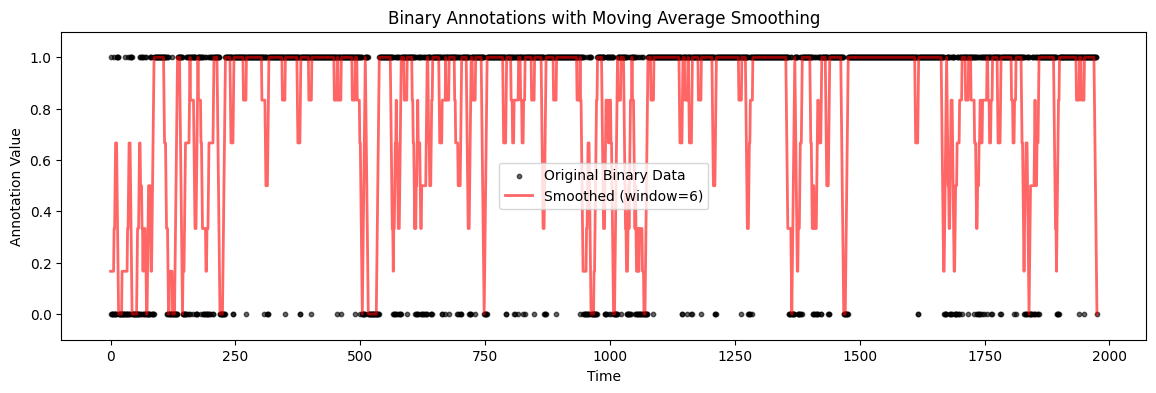

array([[0.16666667],
       [0.16666667],
       [0.16666667],
       ...,
       [0.33333333],
       [0.16666667],
       [0.        ]])

In [77]:
annot = np.load(r'C:\uni\Msc Brain\Lab work\STS_sherlock\projects data\annotations\llava_social_speak_full.npy')
plot_annotation(annot, window_size=6)

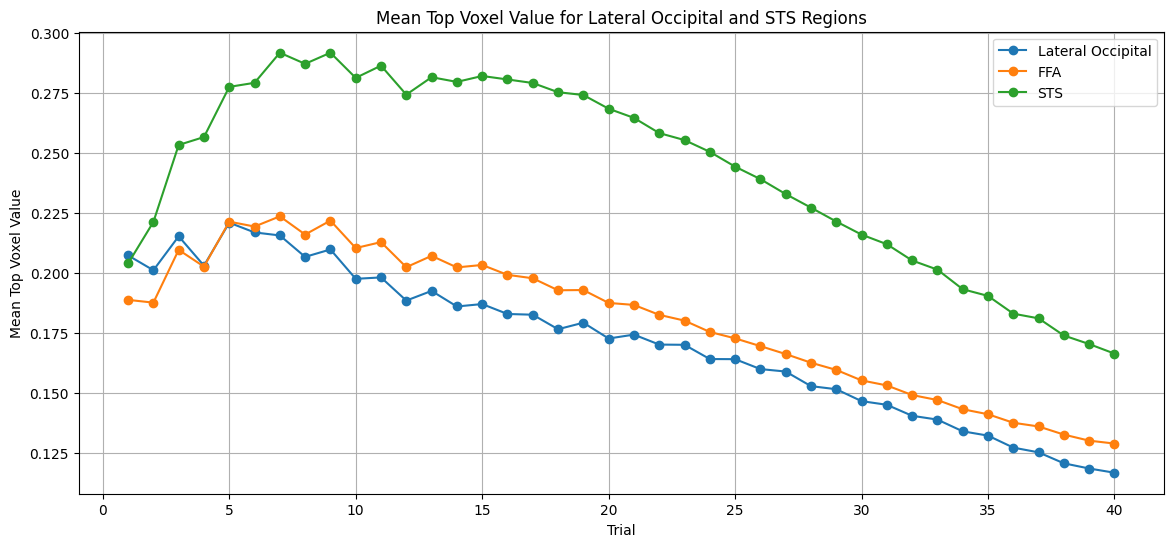

In [73]:
## aggregate trials
base_path = r"C:\uni\Msc Brain\Lab work\STS_sherlock\projects data\results"
regions = [ 'lateral_occipital',"sts","ffa"]
#"C:\uni\Msc Brain\Lab work\STS_sherlock\projects data\results\exp_lateral_occipital_social_range\group\llava_only_social\trial_1\llava_only_social_r.nii"

# Process all regions
results = agg_trials(base_path, regions, n_trials=40, n_top_values=80, model_name="llava_only_social")

# Access values for each region

lateral_occipital_values = results['lateral_occipital']
sts_values = results['sts']
ffa_values = results['ffa']

# Plot the results
trials = range(1, 41)
plt.figure(figsize=(14, 6))
plt.plot(trials, lateral_occipital_values, label="Lateral Occipital", marker="o")
plt.plot(trials, ffa_values, label="FFA", marker="o")
plt.plot(trials, sts_values, label="STS", marker="o")
plt.xlabel("Trial")
plt.ylabel("Mean Top Voxel Value")
plt.title("Mean Top Voxel Value for Lateral Occipital and STS Regions")
plt.legend()
plt.grid(True)
plt.show()

## smooth this data

